In [1]:
import sqlite3
import pandas as pd

db = "database.db"

conn = sqlite3.connect(db)
c = conn.cursor()

data = pd.read_sql("SELECT * FROM data", con=conn, index_col='id')
connection = pd.read_sql("SELECT * FROM connection", con=conn, index_col='id')
additional_data = pd.read_sql("SELECT * FROM additional_data", con=conn)

c.close()
conn.close()

In [2]:
import pandas as pd
combined_data = pd.merge(data, connection, left_on='connection_id', right_on='id')
combined_data = pd.merge(combined_data, additional_data, left_on='name', right_on='color_name')
combined_data.drop(columns=['connection_id', 'name'], inplace=True)
print(combined_data)

                x                    y           z  color_id color_name
0       44.628947    97.81099110033537  569.700453        11      green
1       50.463208    8.814924691205384  492.720476        11      green
2       88.087275    9.427093270234387  596.290924        11      green
3        6.417977    35.19214670661083  235.597430        11      green
4       72.278786   30.597382020856067  277.487142        11      green
...           ...                  ...         ...       ...        ...
101195  25.655053   29.682775349947775  741.128980         2       blue
101196   0.642643  -0.3993578994925102  100.000000         2       blue
101197   2.215343    8.196786377068078  894.188578         2       blue
101198  45.049497    54.55988907902025  644.713304         2       blue
101199  28.269766    87.29854948447347  755.098896         2       blue

[101200 rows x 5 columns]


In [3]:
print(combined_data.dtypes)
combined_data = combined_data.astype({'y': 'float64'})
print(combined_data.dtypes)

x             float64
y              object
z             float64
color_id        int64
color_name     object
dtype: object
x             float64
y             float64
z             float64
color_id        int64
color_name     object
dtype: object


Invalid 100 records were removed as a result of 'inner join' in step 2 (they referred to 'connection_id = 1' and had invalid values in the 'y' column)

In [4]:
temp = pd.merge(data, connection, how='left', left_on='connection_id', right_on='id')
temp[temp.y.str.isalpha()]['connection_id'].value_counts()

1    100
Name: connection_id, dtype: int64

In [5]:
combined_data.rename(columns={'color_name': 'color'}, inplace=True)

In [6]:
print(combined_data['color'].unique())

['green' 'orange' 'yellow' 'red' 'black' 'blue']


In [7]:
selected_data = combined_data.loc[combined_data['z']==100]

In [8]:
red_selected_data = selected_data.loc[selected_data['color']=='red'].copy()
x_mean, y_mean = red_selected_data[['x', 'y']].mean()
red_selected_data['x-mean'] = red_selected_data['x'] - x_mean
red_selected_data['y-mean'] = red_selected_data['y'] - y_mean
red_selected_data['distance'] = (red_selected_data['x-mean'] ** 2 + red_selected_data['y-mean'] ** 2).pow(0.5)
sigma = red_selected_data['distance'].std()
to_remove = red_selected_data.loc[red_selected_data['distance'] > sigma]
selected_data = selected_data.drop(to_remove.index)

In [9]:
selected_data.reset_index(drop=True, inplace=True)

In [10]:
ns1 = selected_data[['x', 'y', 'color']].copy()
ns1.to_hdf('ns1.hdf5', key='df', format='table')

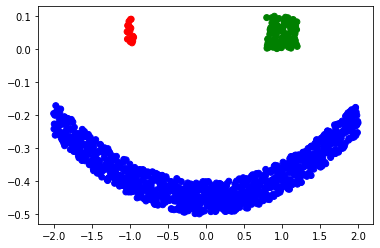

In [11]:
import matplotlib.pyplot as plt
loaded_data = pd.read_hdf('ns1.hdf5')
plt.scatter(x=loaded_data['x'], y=loaded_data['y'], c=loaded_data['color'])
plt.show()

In [12]:
plt.savefig('final_picture.png')

<Figure size 432x288 with 0 Axes>